In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import get_iris_data
import wrangle_mall
np.random.seed(4)

df = get_iris_data.get_iris_data()


In [2]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.10,3.50,1.40,0.20,setosa
1,1,2,4.90,3.00,1.40,0.20,setosa
2,1,3,4.70,3.20,1.30,0.20,setosa
3,1,4,4.60,3.10,1.50,0.20,setosa
4,1,5,5.00,3.60,1.40,0.20,setosa


In [3]:
X = df[['sepal_width', 'petal_width']]

In [4]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
df['cluster'] = kmeans.predict(X)

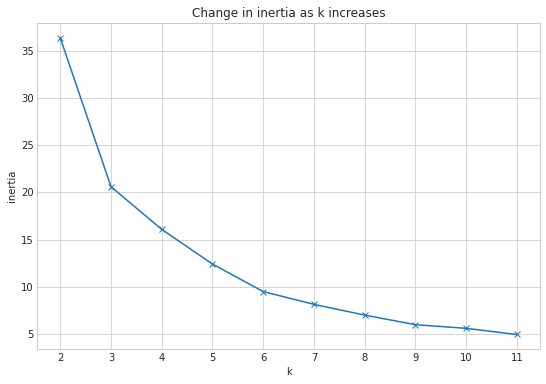

In [6]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

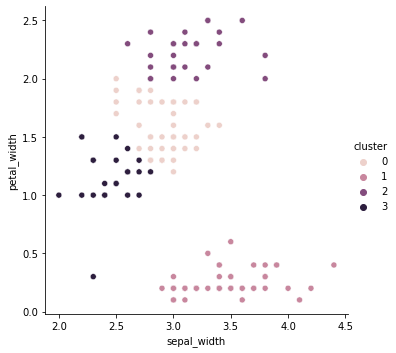

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='sepal_width', y='petal_width', hue='cluster')


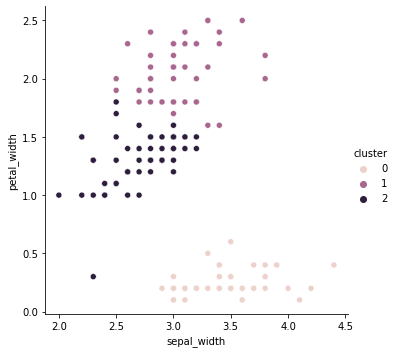

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='sepal_width', y='petal_width', hue='cluster')


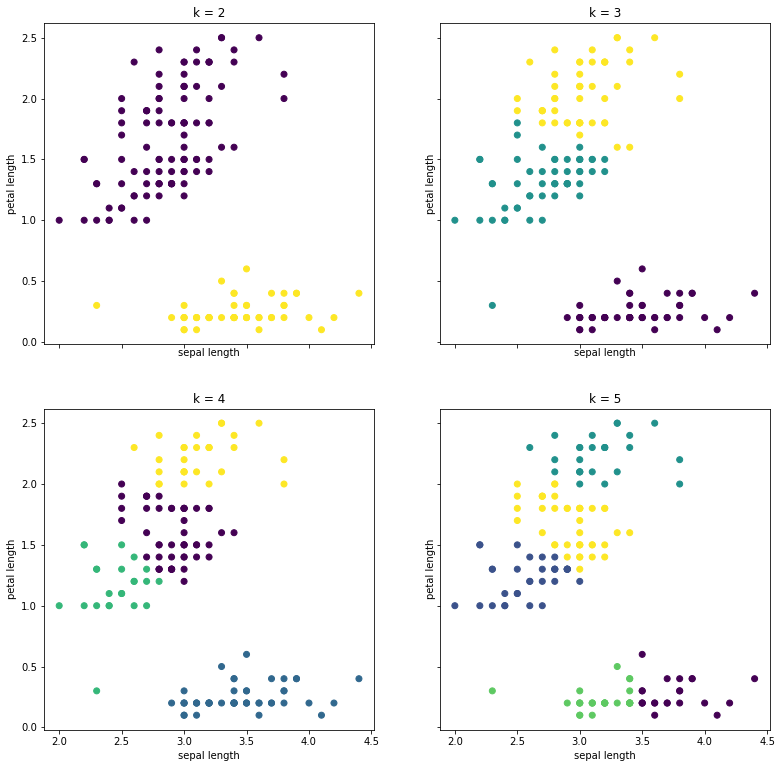

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')


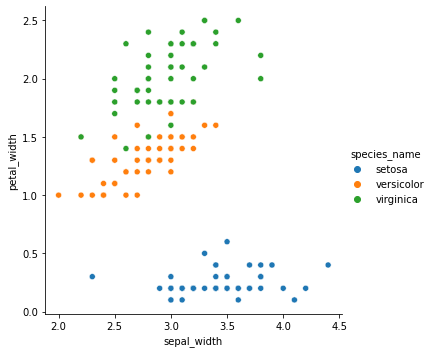

In [10]:
sns.relplot(data=df, x='sepal_width', y='petal_width', hue='species_name')

K3 seems to have the fewest errors when comparing it 

In [11]:
kmeans.cluster_centers_

array([[3.45102041, 0.24489796],
       [3.04166667, 2.05208333],
       [2.70754717, 1.30943396]])

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids

,sepal_width,petal_width
0,3.45,0.24
1,3.04,2.05
2,2.71,1.31


Text(0.5, 1.0, 'Visualize cluster centers')

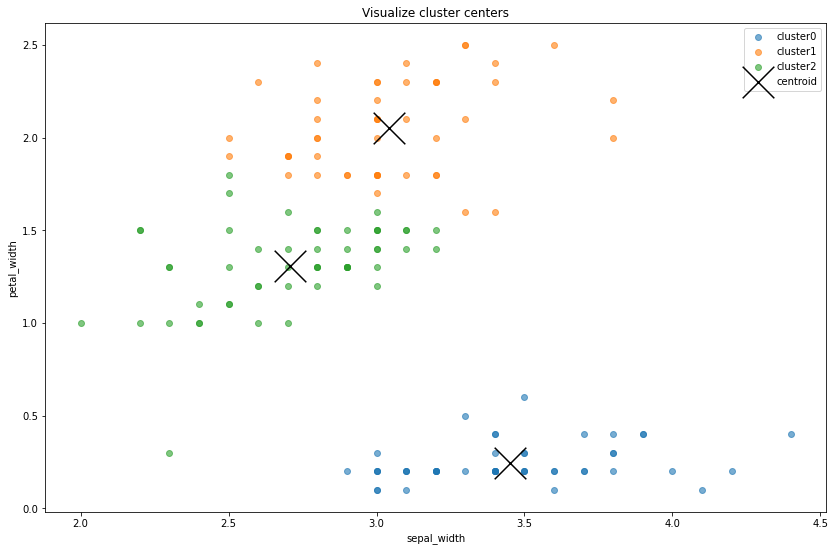

In [13]:
plt.figure(figsize = (14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label = 'cluster' + str(cluster), alpha = .6)
    
centroids.plot.scatter(y='petal_width', x = 'sepal_width', c='black', marker = 'x', s = 1000, ax=plt.gca(), label = 'centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualize cluster centers')

# 1 d 

In [14]:
X = df[['sepal_width', 'petal_width', 'petal_length']]

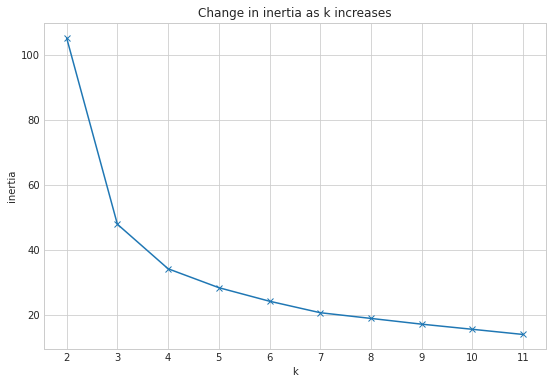

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

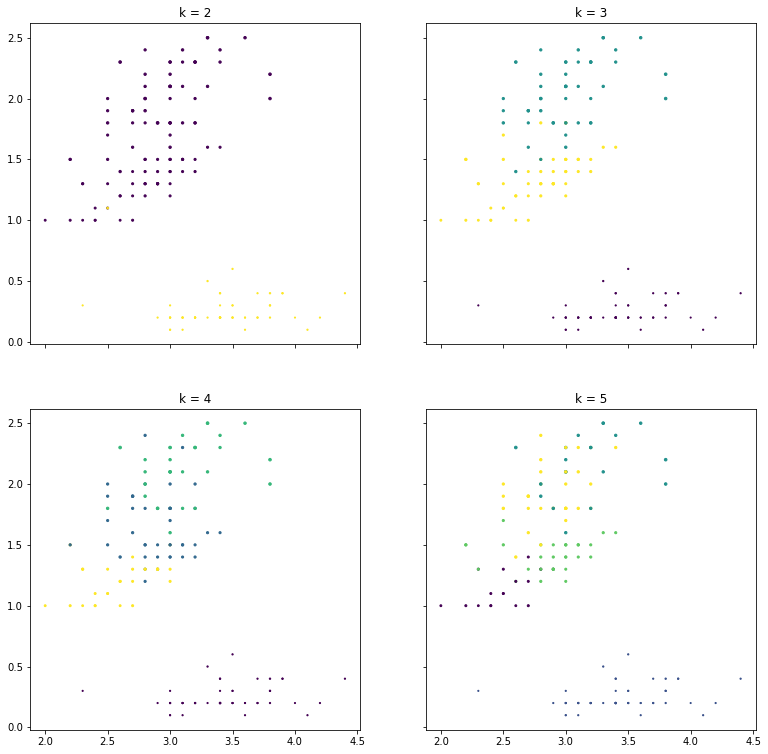

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k))

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width,petal_length
0,3.43,0.25,1.46
1,3.00,2.04,5.61
2,2.75,1.35,4.28


my head isn't really wrapping around the idea of graphically representing more than 2 features without using a hue, or if/how to graph more than two features. I know that ultimately, i may not need to do this, but it would be nice to know how to if it is possible

# 2 

In [19]:
df = wrangle_mall.get_mall_data()

In [20]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [22]:
df.gender.replace({'Male': 1, 'Female': 0}, inplace = True)

In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [24]:
X = df[['annual_income','spending_score']]

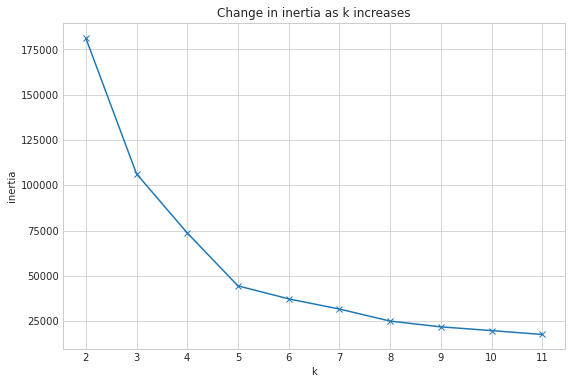

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

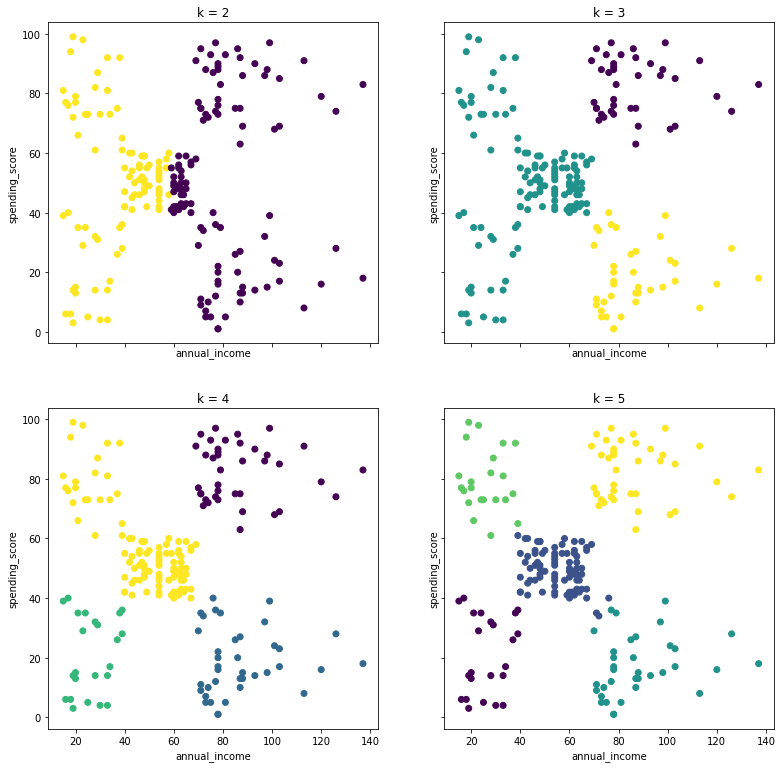

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

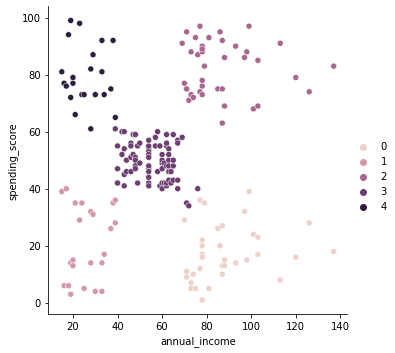

In [27]:
sns.relplot(x = 'annual_income', y = 'spending_score', hue = clusters, data = df)

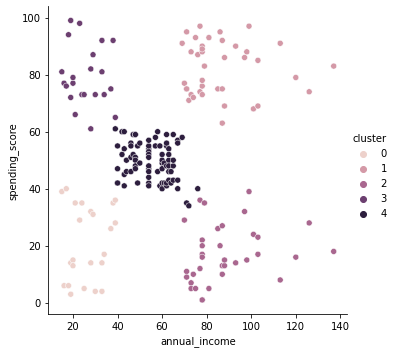

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster')

In [38]:
df.columns.values.tolist()

['customer_id', 'gender', 'age', 'annual_income', 'spending_score', 'cluster']

In [48]:
columns = ['gender', 'age', 'annual_income', 'spending_score', 'cluster']

In [49]:
def cluster_pairs_plot():
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    df['cluster'] = kmeans.predict(X)
    for col in columns:
        sns.relplot(data = df, x = col, y = 'spending_score', hue = 'cluster')

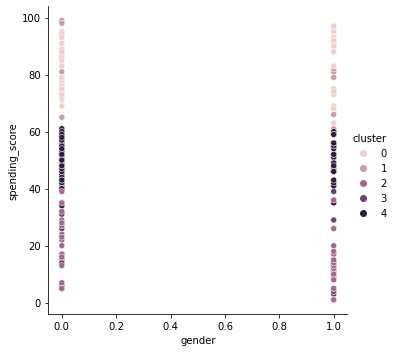

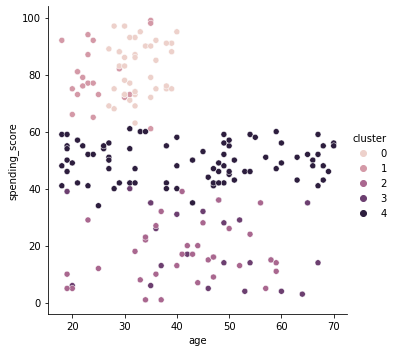

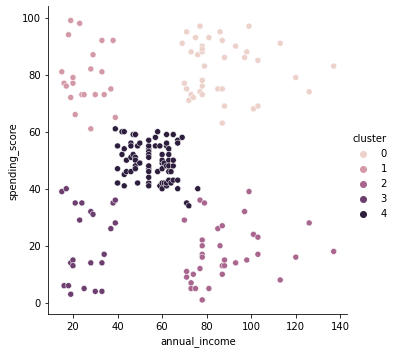

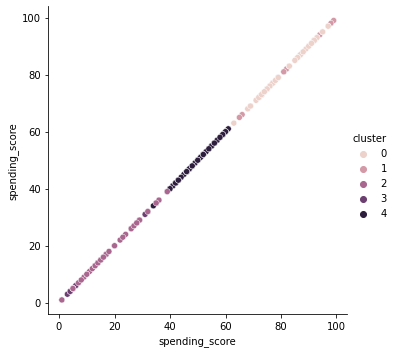

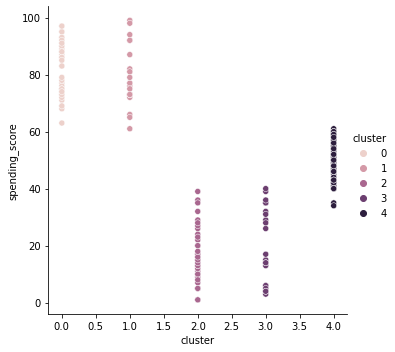

In [50]:
cluster_pairs_plot()

In [71]:
X = df[['age','spending_score']]

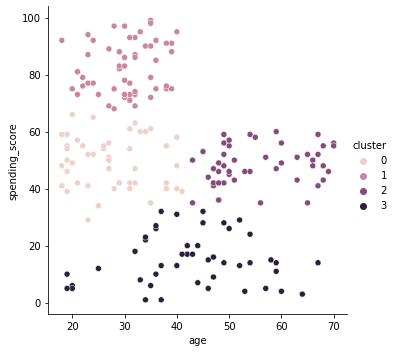

In [72]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='spending_score', hue='cluster')

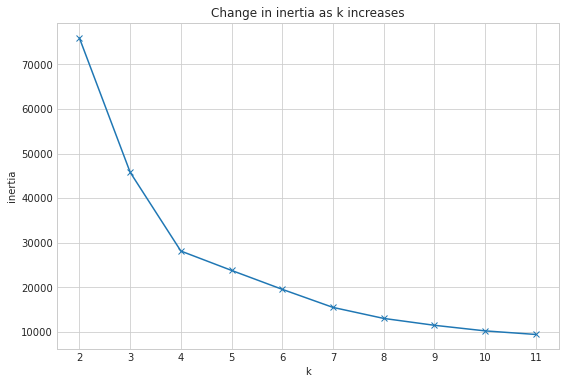

In [73]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

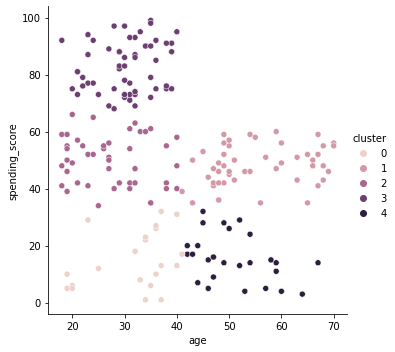

In [76]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='spending_score', hue='cluster')


KeyError: 'age'

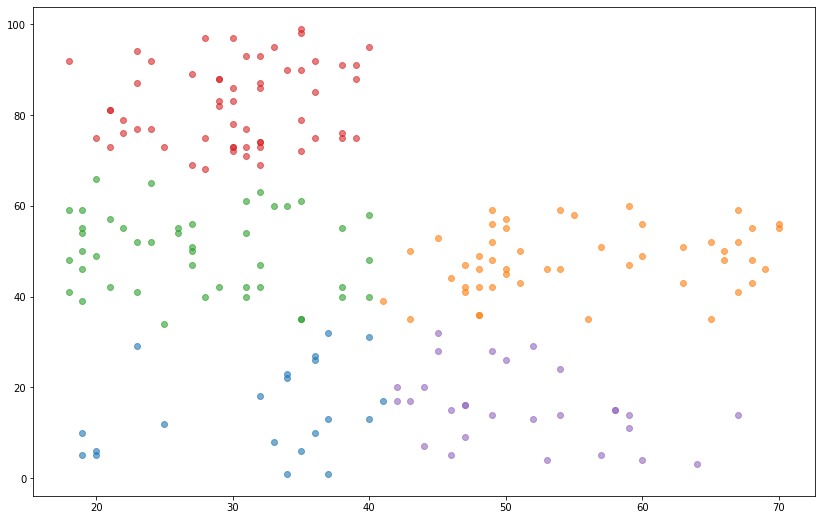

In [78]:
plt.figure(figsize = (14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.spending_score, label = 'cluster' + str(cluster), alpha = .6)
    
centroids.plot.scatter(y = 'spending_score',x='age', c='black', marker = 'x', s = 1000, ax=plt.gca(), label = 'centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('spending_score')
plt.title('Visualize cluster centers')